### 卷积神经网简介（CNN）
- 卷积神经网络就是一种包含卷积计算的神经网络。
- 什么是卷积计算？
    - 卷积计算是一种计算方式，有一个卷积窗口(Convolution Window)在一个平面上滑动，每次滑动会进行一次卷积计算得到一个数值（Value），卷积窗口滑动计算完成后会得到一个用于表示图像特征的特征图(Feature Map)。
    - 举例：下面是一个大致的卷积计算流程
        - 用一个 3×3 的卷积窗口对 4×4 的图片求卷积，卷积的移动步长为 1，最后得到 2×2 的特征图
        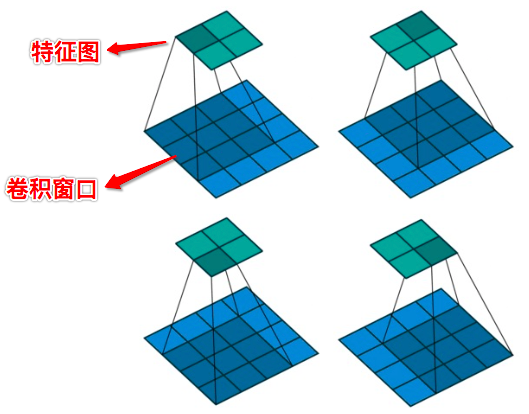

### BP 神经网络存在的问题
- 在前面我们使用了 BP 神经网络来处理 MNIST 手写数字识别的任务，并且得到了还不错的识别效果。有一个细节问题当时我们可能没有注意到，当时我们使用的手写数字图 片是 28×28 的黑白图片，输入数据一共有 28×28×1（黑白图片颜色通道为1）个数据，所以输入层只需要 784 个神经 元。假如我们有一张 1000×1000 的彩色图片，那么输入层神经元就需要 1000×1000×3（彩色图片颜色通道为3）个， 我们使用带有一个隐藏层的神经网络，隐藏层神经元个数为 1000，那么输入层和隐藏层之间 权值的个数就会有30亿个，这是一个非常巨大的数字。
- 如此大量的权值会带来两个问题
    - 一个问题是计算量巨大，要计算这么多权值就需要花费大量时间。
    - 第二个问题是要训练这么多权值就需要大量的训练样本来进行训练，防止模型过拟合。
- 因此我们需要使用卷积神经网络解决计算机视觉任务中权值数量巨大的问题。

### 卷积的具体计算
- 卷积层中的神经元连接不是全连接的，而是后一层的每个神经元 连接前一层的一部分神经元。如下图所示
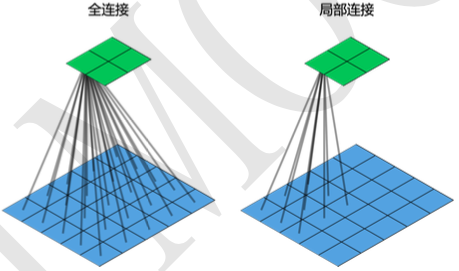
    - 左边为 BP 网络的全连接结构，右边为卷积网络的局部连接结构
    - 图中一条连线就是一个权值，如果神经元不是全连接，那么权值就减少了很多
    - 此外卷积神经网络还用到了权值共享，权值共享指的是同一卷积层中的同一个卷积窗口的权值是共享的。

#### 下面我们来讲解一下卷积的具体计算流程
- 卷积窗口又称为卷积核(Convolution Kernel)，卷积之后生成的图称为特征图。卷积窗口/卷积核一般都是使用正方形的，比如 1× 1，3×3，5×5 等，极少数特殊情况才会使用长方形。
- 对一张图片求卷积实际上就是卷积核在图片上面滑动，并进行卷积计算。
- 卷积计算很简单，就是卷积核与图片中对应位置的数值相乘然后再求和。
- 我们可以通过下面的具体例子来理解，假设我们有一个 3×3 的卷积核，如下图所示：
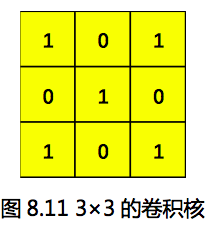
- 然后我们使用该卷积核，对 4×4 的图片求卷积，图片如下：

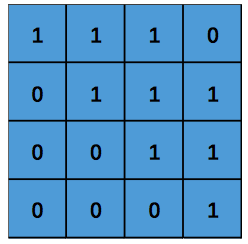
- 3×3 的卷积核对 4×4 的图片求卷积，步长为 1，可以分为 4 个步骤
    - 第一步，对左上方9 个数求卷积

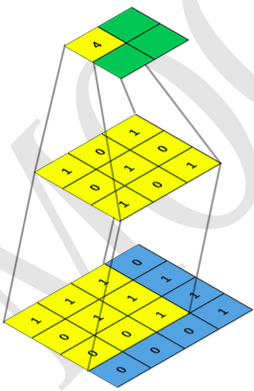
- 具体卷积计算为:1×1+0×1+1×1+0×0+1×1+0×1+1×0+0×0+1×1=4

- 第二步：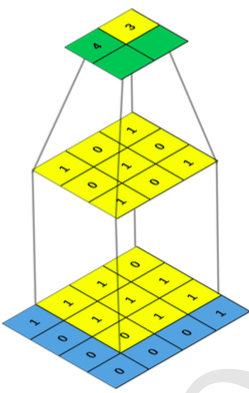
- 具体卷积计算为:1×1+0×1+1×0+0×1+1×1+0×1+1×0+0×1+1×1=3。

- 第三步：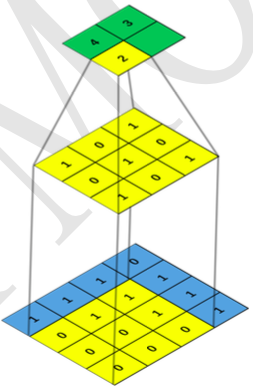
- 具体卷积计算为:1×0+0×1+1×1+0×0+1×0+0×1+1×0+0×0+1×0=2。

- 第四步：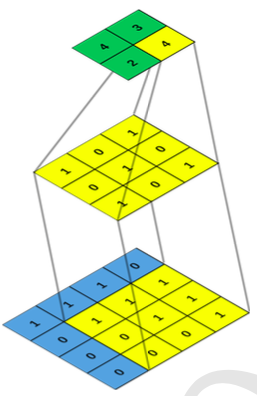
- 具体卷积计算为:1×1+0×1+1×1+0×0+1×1+0×1+1×0+0×0+1×1=4。

- 上述的卷积计算如图下所示：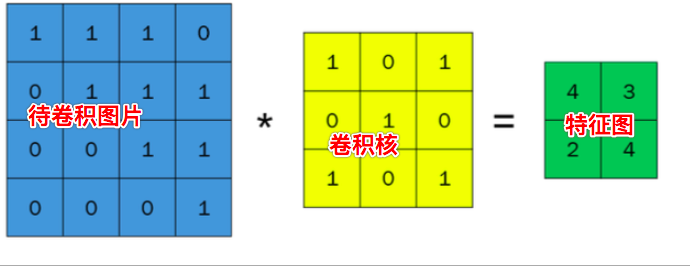

注意：卷积核平移的步长不同则得到的特征图的大小是不一样的

#### 进一步理解卷积核提取特征

现在有一张手写数字图片，图片显示的数字为1，则假设图片原始数据矩阵为：
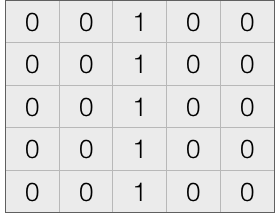

然后我们使用一个卷积核对图片数据进行特征提取：
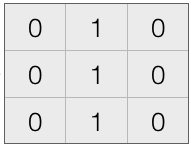

提取后形成的特征图为：
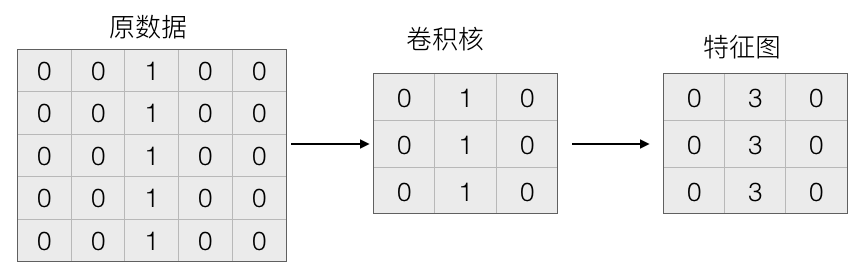

发现：指定形式的卷积核可以很好的将原始图片的特征数据进行提取，形成的特征图重元素值大的位置就是提取出来主要的图像特征，计算机就可以根据数值大的位置结合原始标签数据对应识别出具体的数字是多少，从而实现了图像识别。

### 卷积的步长
- 卷积的步长指的是卷积每一次移动的步数，前面我们列举的例子中，卷积的步长为 1，卷积的步长理论上可以取任意正整数。
    - 在计算机视觉中一般使用1步长，但是在其他领域，比如NLP中步长则可能需要调整的大一点。
- 例如下图为步长为2的卷积：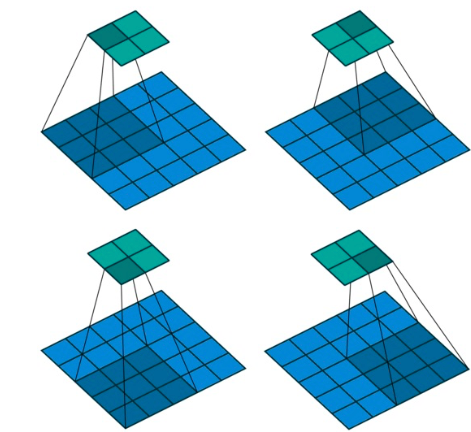

### 不同的卷积核
- 注意：卷积核的计算是有多种方式的，因此可有产生多种不同的卷积核
- 使用不同的卷积核来对同一张图片求卷积会得到不同的结果，如图：
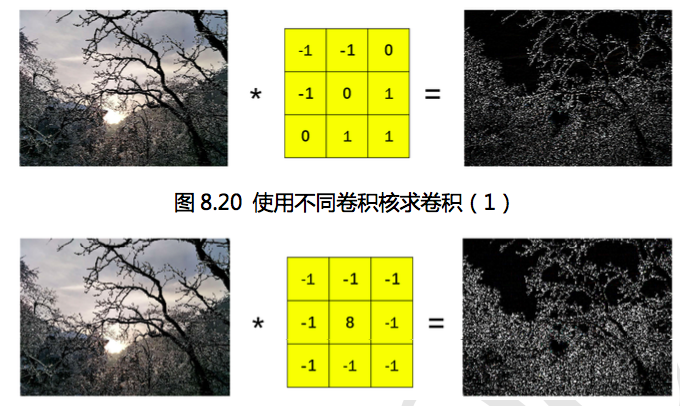
- 所以在卷积神经网络中，我们通常会使用多个不同的卷积核来对同一图像求卷积，目的就是为了可以提取出图像中多种不同的特征。

- 那么卷积核的取值要怎么取?
    - 如果是使用传统的机器学习思维，我们能想到的方法可能是人为设计大量不同的卷积核，然后使用大量图片来做测试，最后分析哪种卷积核提取出来的特征比较有效。
    - 那在深度学习里面，卷积核的取值在卷积神经网络训练最开始的阶段是随机初始化的，之后结合误差反向传播算法，逐渐训练得到最终的结果。我们只能够决定卷积核的维度即可。维度大小的话，常见的是3x3，但为什么是3x3，并没有理论依据，通过大量的实践测试得来的，这个大小最好用。
        - 训练好的卷积核就可以作为特征提取器，用于提取图像特征，然后传到网络后面的全连接层，用于分类回归等任务。

- 注意：
    - 在同一个卷积核中的权值（卷积核中的数值）是共享的，在不同的卷积核中的权值是不共享的。假设使用 6 个 5×5 的卷积核对一幅图像求卷积，会产 6×5×5=150 个权值加 6 个偏置值，卷积后会得 到 6 个不同的特征图
    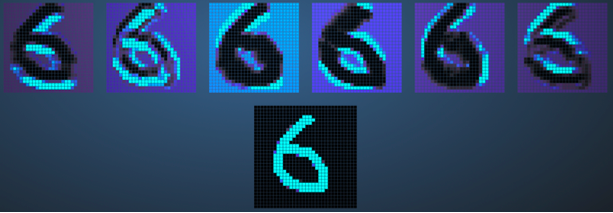

### 池化(Pooling)
- 一个经典的卷积层包含 3 部分，卷积计算->非线性激活函数->池化(Pooling)，如图所示：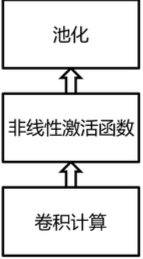
- 池化也有一个滑动窗口在图像中进行滑动计算，这一点跟卷积有点类似，不过注意：
    - 池化层中没有需要训练的权值（类似于卷积核中的数据值）。


- 池化的实现：
    - 池化也有池化窗口，对图像进行扫描计算，这一点跟卷积类似。池化通常可以分为三种方式：
        - 最大池化(Max-Pooling)：最大池化指的是提取池化窗口区域内的最大值
        - 平均池化(Mean-Pooling)：平均池化指的是提取池化窗口区 域内的平均值
        - 随机池化(Stochastic Pooling)：随机池化指的是提取池化窗口区域内的随机值
    - 其中最常用的是最大池化。
    - 案例：常用的池化窗口大小为 2×2，步长为 2。池化窗口大小为 2×2，步长为2的最大池化计算如图所示
    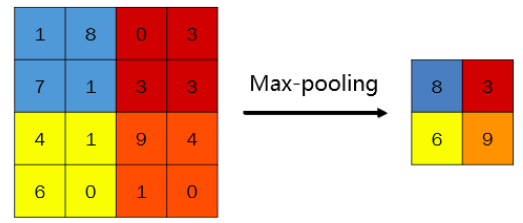

- 池化的作用：
    - 我们通常会使用多个不同的卷积核来对图像求卷积，之后生成很多个不同的特征图，卷积网络中的权值参数仍然是很多的。池化的一个作用是可以做进一步的特征提取，减少权值参数的个数。
    - 池化的另一个作用是使得网络的输入具有平移不变形。平移不变形指的是当我们对输入进行少量平移时，经过池化后的数值并不会发生太大变化。
        - 这是一个非常有用的性质，因为我们通常关心的是某个特征是否在图像中出现，而不是关心这个特征具体出现的位置。
        - 例如我们要判断一张图片中是否有猫，我们并不关心猫是出现在图片上方，还是下方，还是左边，还是右边，我们只关心猫是否出现在图片中，如图所示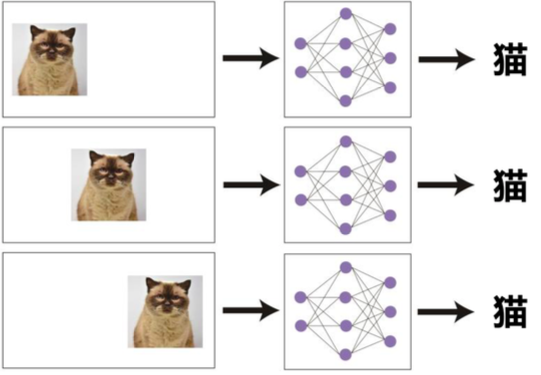
    - 不过稍微要注意的是我们对输入进行少量平移时，经过池化后的数值并不会发生太大变化。如果对输入平移太多时，池化后的数值还是会发生较大变化的。

### Padding
- 在卷积神经网络中我们通常会堆叠多个卷积层的结构，形成一个深度的卷积神经网络。 
- 堆叠多个卷积层结构会碰到一些问题
    - 问题1：每一次做卷积，得到的特征图就会比原来的图像要变小一些，这样特征的数量会不断减少。
        - 例如使用 3×3 的卷积核对 4×4 的图像求卷积，步长为 1，卷积后得到一个 2×2 的特征图，如图所示：
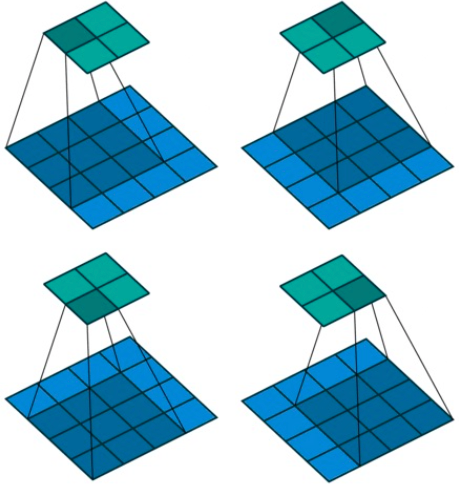

- 问题2：在计算卷积的时候图像中间的数据会重复使用多次，而图像边缘的数据可能只会被用到一次。
    - 在下图中，使用 3×3 的卷积核对 4×4 的图像求卷积，步长为 1
    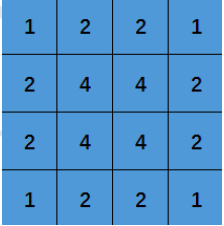
    - 图中四个角的四个数据只计算了一次，而图像中心的四个数据则计算了四次，这就表示卷积容易丢失掉图像的边缘特征(不过其实边缘位置的信息一般来说也没这么重要)。

- 针对上述两个问题，我们可以使用 Padding 的方式来解决。卷积和池化操作都可以使用 Padding，Padding 一般有两种方式：
    - Valid Padding
    - Same Padding。

- Valid Padding 其实就是不填充。不填充数据那么卷积后得到的特征图就会比原始图像要小一点
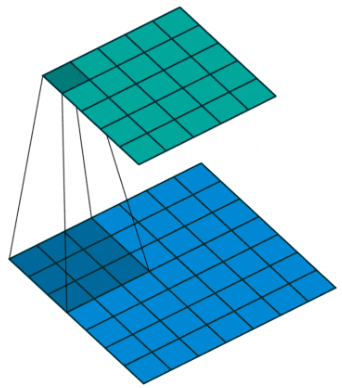

- Same Padding 指的是通过填充数据(一般都是填充 0)，使得卷积后的特征图的大小跟原始的图像大小相同
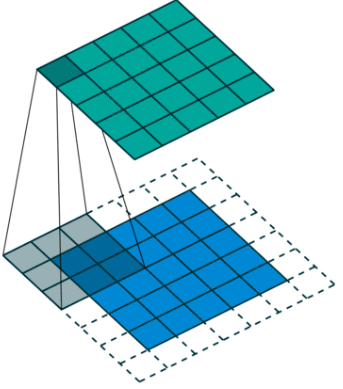

- 上图中使用 3×3 的卷积核对 5×5 的图像进行求卷积的操作，步长为 1。给原图像外圈填充 1 圈 0 之后再做卷积，卷积后得到的特征图大小就可以跟原始图像相同，也是 5×5 的大小。 同理如果使用 5×5 的卷积核对图像进行求卷积的操作，步长为 1，给原图像外圈填充 2圈 0 之后再做卷积，卷积后得到的特征图大小就可以跟原始图像相同。

- 结论：使用了Same Padding进行外围填充后，则可以保证在计算卷积的时候图像的中间和边缘的数据被使用的次数是一致的，则表示图片边缘的特征不会丢失。


- 思考：如果使用Same Padding的方式进行卷积，会发现卷积后的特征图和原始特征的形状尺寸一致，这么做有何意义呢？
    - 步伐不为1，则还是可以实现简化特征的作用。即使步伐为1，也可以将特征中的核心特征进行最大化的提取！

### 卷积计算总结巩固


#### 对 1 张图像进行卷积生成 1 张特征图
- 对 1 张图像进行卷积生成 1 张特征图是最简单的一种卷积方式，前面我们已经进行了详解的举例计算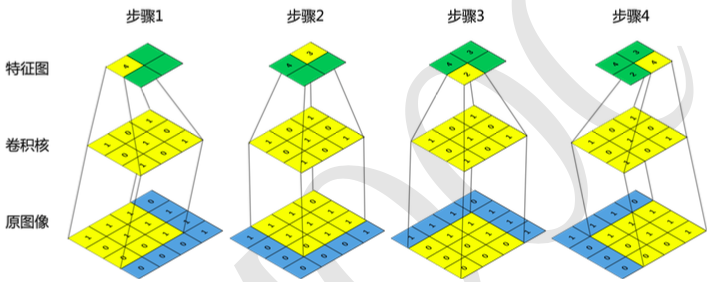
- 假如我们只统计乘法的计算量，图中一种进行了 3×3×4（卷积核大小3*3乘以特征图大小4） 次乘法计算。总共有 9 个权值和1 个偏置值需要训练

#### 对 1 张图像进行卷积生成多张特征图
- 生成多张特征图需要使用多个不同的卷积核，使用多个不同的卷积核来求卷积。这里我们 使用 3 个不同的 5×5 大小的卷积核对 32×32 的图像求卷积，使用 Same Padding 的方式， 步长为 1，卷积计算后生成 3 个不同的特征图
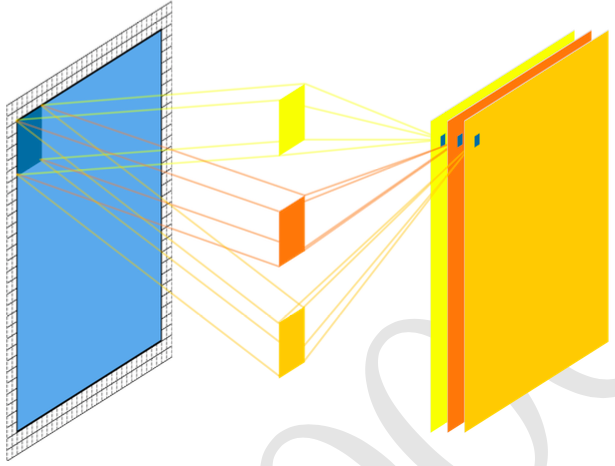
- 因为每个卷积核中的权值不同，所以使用 3 个不同的卷积核求卷积会得到 3 个不同的特征图。
- 一个卷积核会对原始图像进行 5×5×28×28 次乘法计算，所以总共计算量为 5×5×28 ×28×3=58800（28*28是特征图原始大小）。总共有 5×5×3=75 个权值和 3 个偏置值需要训练。偏置值数量主要跟特征图数量相关，每个特征图有 1 个偏置值。

#### 对多张图像进行卷积生成 1 张特征图
- 比如我们多 1 张彩色图片求卷积，彩色图片可以看成是 RGB 三原色的组合，所以可以看 成是 3 张图像的叠加组合。这里我们对 3 张 32×32 的图像求卷积，卷积窗口大小为 5×5，使用 Same Padding 的方式，步长为 1，卷积计算后生成 1 张特征图
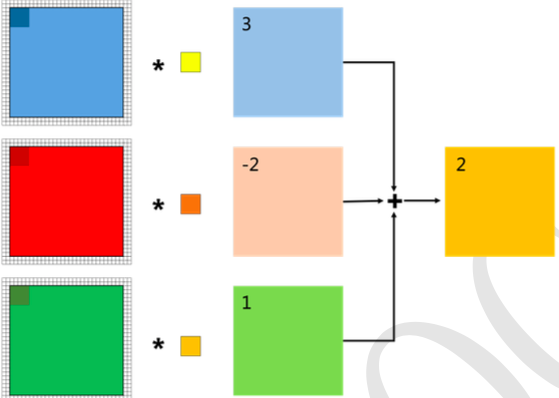
- 对 3 张图像进行卷积的时候先分别对每张图像进行卷积，得到 3 个大小相同，数值不同的特征图。然后再对每个特征图对应位置的数值进行相加，最后得到 1 个特征图
    - 一个卷积核会对原始图像进行 5×5×28×28 次乘法计算，所以总共计算量为 5×5×28× 28×3=58800。
    - 这里要注意，我们对不同图像进行卷积的时候，所使用的卷积核也是不同的，所以总共有 5×5×3=75 个权值和 1 个偏置值需要训练。
##### 滤波器Filter
- 这里我们把对多张图像进行卷积的多个不同的卷积核称为一个滤波器(一个滤波器包含了多个卷积核)，一个滤波器可以产生一个特征图。在我们写程序搭建网络结构的时候，我们需要定义卷积层 Filter 的数量，实际上就是在定义卷积完最后生成的特征图的数量（上图中卷积后最终生成了一个特征图）。

#### 对多张图像进行卷积生成多张特征图
- 对多张图像进行卷积生成多张特征图相对来说最难理解同时也是最常见的情况。在卷积网络中，很多时候都需要对多张图像进行卷积然后生成多张特征图。
- 这里我们使用 128 个滤波器对 64 张 32×32 的图像求卷积，使用 Same Padding 的方式，步长为 1，卷积计算后生成128 个不同的特征图。每个滤波器由 64 个不同的 5×5 卷积核组成，如图所示：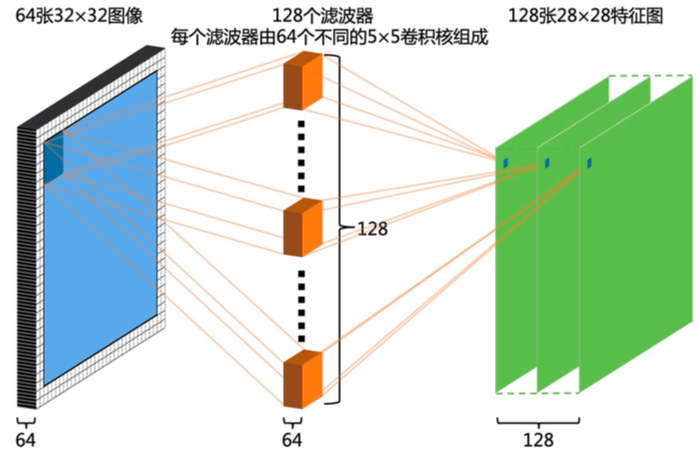
- 下面我们来分析一下上面这个例子的计算量和权值数量。1 个滤波器对 64 张图像进行卷积，得到 1 张特征图。1 个滤波器中有 64 个不同的 5×5 卷积核。每个 5×5 卷积核对 1 张图 像求卷积。
- 1 个卷积核对 1 张图片求卷积的计算量是 5×5×28×28，所以 1 个滤波器 64 个卷积核的 计算量是 5×5×28×28×64。一共有 128 个不同的滤波器，所以总的计算量是 5×5×28×28 ×64×128=160563200。
- 每个卷积核有 5×5 个权值，1 个滤波器有 64 个卷积核有 5×5×64 个权值，128 个滤波 器有 5×5×64×128=204800 个权值，加上 128 个偏置值。
